# CFD笔记
1. 写出直角坐标系下的三维 Navier-Stokes 方程，并将其无量纲化；


In [3]:
print('......')

......


2. 计算两点边值问题
$$ -u^{''}(x) + u(x) = e^{x}(sin(x) - 2cos(x)), \quad 0 \leq x \leq \pi,$$
$$ u(0) = 0, \quad u(\pi) = 0. $$
该定解问题的精确解为 $u(x) = e^{x}sin(x)$.

解：将区间 $[0,\pi]$ 作 $m$ 等分，记 $h=\pi/m, x_{i}=ih, 0\leq i\leq m$. 构造差分格式如下
$$ -\delta_{x}^{2}u_{i} + u_{i} = e^{x_{i}}(sin(x_{i}) - 2 cos(x_{i})), \quad 1\leq i \leq m-1 $$
$$ u_{0} = 0,\quad u_{m} = 0. $$

In [28]:
import numpy as np

def f(x):
    return np.exp(x)*(np.sin(x)-2*np.cos(x))

def solve(m):
    h = np.pi / m
    u = np.zeros(m+1)
    g = np.zeros(m+1)
    w = np.zeros(m+1)
    
    for i in range(1,m):
        x_i = i * h
        g[i] = (h**2 * f(x_i) + g[i-1]) / (h**2 + 2 + w[i-1])
        w[i] = -1 / (2+h**2 + w[i-1])
    u[m] = g[m]
    for i in range(0,m-1):
        j = m - i - 1
        u[j] = g[j] - w[j]*u[j+1]
    return u

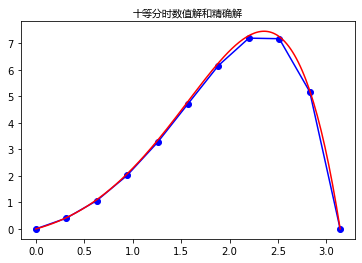

In [60]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/run/media/z/MyFiles2T/Win/fonts/msyh.ttc')

m = 10
u = solve(m)
x = np.linspace(0,np.pi,m+1)
plt.plot(x, u,'b')
plt.plot(x, u,'bo')
x = np.linspace(0,np.pi,161)
plt.plot(x, np.exp(x)*np.sin(x),'r')
plt.title('十等分时数值解和精确解', fontproperties=font1)
plt.show()

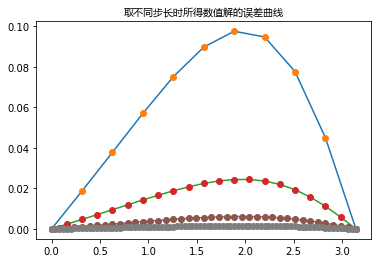

In [61]:
for m in [10,20,40,80]:
    u = solve(m)
    x = np.linspace(0,np.pi,m+1)
    ue = np.exp(x)*np.sin(x)
    err = np.abs(u - ue)
    plt.plot(x,err)
    plt.plot(x,err,'o')
plt.title('取不同步长时所得数值解的误差曲线', fontproperties=font1)
plt.show()